# Librerías

In [757]:
!pip3 install numpy
!pip3 install pandas
!pip3 install openpyxl
!pip3 install matplotlib
!pip3 install statsmodels
!pip3 install --upgrade statsmodels
!pip3 install scikit-learn




[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip3 install --upgrade pip


In [351]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.stats import levene
from statsmodels.tsa.stattools import adfuller
from scipy.special import inv_boxcox
from scipy.stats import shapiro
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.api import OLS, add_constant
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Parte Mafer

# Actividad 9.1. 
Elabore un resumen de máximo una cuartilla sobre la lectura de la sección de antecedentes en (INEI, 2002)

La desestacionalización está asociada a la idea de que una serie de tiempo está constituida por componentes no observables. La idea de componentes no observables surge con un análisis económico en el siglo XIX, especificamente en Francia, donde se creó un comité encargado de proponer métodos para separar las componentes de la serie, con el fin básico de pronosticarlos por separado.
Posteriormente, Estados Unidos trató de hacer lo mismo pero con la idea de construir un sistema de índices llamado "barómetro de proyección del ciclo económico". para apreciar las condiciones corrientes de la economía nacional y para el pronóstico de su desarrollo futuro.

En 19192 Warren M. Person, publicó un artículo sobre los métodos de estudio y de pronóstico de las condiciones económicas generales de los Estados Unidos. El método de Pearson consiste en dos partes: primero, aislar estadísticamente los cambios ocasionados por las fluctuaciones en las condiciones de los negocios. Segundo, elaboración de cierto número de índices que señalarían en qué fase del ciclo económico se encuentra la economía general en un momento dado y que facilitarían un pronóstico de su desarrollo futuro.

Los métodos para encontrar estos índices, determinar y aislar los procesos que reflejan el ciclo económico, se denominaron métodos de Harvard.
En esta metodología se señala que la mayoría de las series presentan cuatro tipos de variaciones: 1) Variaciones que presentan cierta tendencia general 2) Fluctuaciones cíclicas o de la situación económica que aproximadamente corresponden a los ciclos económicos generales; 3) Fluctuaciones estacionales, que aparecen en series de datos trimestrales o mensuales; y 4) Fluctuaciones irregulares.

El procedimiento empleado en la investigación de Harvard para obtener las fluctuaciones cíclicas como un componente representante de la influencia del ciclo económico general sobre la marcha de la economía es como sigue: Se aísla la tendencia de la serie cronológica, suponiendo que es el resultado de un complejo de causas que actúan sostenidamente en una dirección e inducen el crecimiento de la economía nacional. Si la serie es trimestral o mensual se hallan las fluctuaciones estacionales cuyas causas están ligadas con frecuencia, al movimiento de la tierra (cambios de temperatura, días más largos o más cortos), o a causas de carácter social y convencional, como la elevación de las ventas en períodos de vísperas de días festivos.
Una vez que la tendencia y las fluctuaciones estacionales se han aislado, se sustraen de la serie original.
Es necesario mencionar al respecto, que la Escuela de Harvard sostenía que un cierto conjunto de causas produce la tendencia, independientemente de otro conjunto de causas que inducen las variaciones cíclicas.
En el largo plazo, lo que determina el movimiento de la series son factores. Estos factores son los que caracterizan la componente permanente o la tendencia de la serie. Además las fluctuaciones de las series alrededor de su componente permanente se define como componente cíclica.

Actualmente se han desarrollado procedimientos sofisticados para descomponer una serie de tiempo, en particular efectuar la desestacionalización de la serie (X11 ARIMA, X12 ARIMA), así como, una importante experiencia en el tratamiento empírico de los ciclos, tratando de caracterizarlos y prever su dinámica a través de un conjunto de series económicas utilizadas como indicadores de los ciclos de los negocios, clasificados en indicadores conducentes, coincidentes y retrasados.

# Ejemplo 9.1.1. 
Traveler ́s Rest, Inc., administra cuatro hoteles y están interesados en un modelo de pronóstico a corto plazo (un año) para la cantidad de habitaciones ocupadas en dichos hoteles, a efecto de decidir la contratación de empleados extra para el verano, así como presupuestos para publicidad y compra de materiales que tardan mucho en ser entregados. La tabla 9-1 muestra los datos disponibles de 14 años (el año 15 se utilizó como validación del modelo); dado que se desean pronósticos mensuales, se promediaron las observaciones de un mes entre el número de días del mes. Grafique los datos, identifique si existe algún tipo de patrón estacional y, si es necesario, aplique una transformación de potencia para lograr una fluctuación estacional constante.


## Carga de datos

In [373]:

df = pd.read_excel("/Users/maferpazaran/Downloads/Hab.xlsx")
df

,t,Yt
0,1,501
1,2,488
2,3,504
3,4,578
4,5,545
...,...,...
163,164,1124
164,165,868
165,166,860
166,167,762


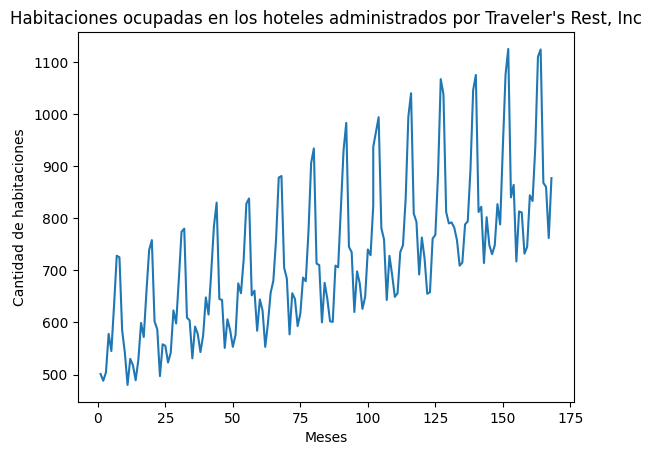

In [249]:
plt.plot(df['t'],df['Yt'])
plt.title("Habitaciones ocupadas en los hoteles administrados por Traveler's Rest, Inc")
plt.xlabel("Meses")
plt.ylabel("Cantidad de habitaciones")
plt.show()

Podemos observar que la gráfica de nuestra serie de tiempo, presenta tendencia creciente y una media no constante. Además, notamos picos significativos cada cierto periodo, lo cual nos indica estacionalidad, esto también podemos visualizarlo a través de la ACF y PACF. 

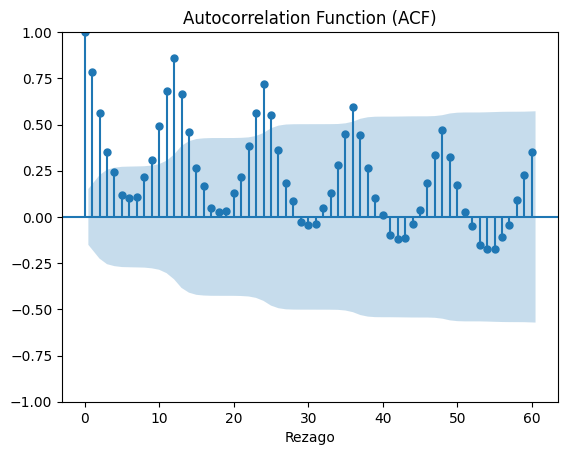

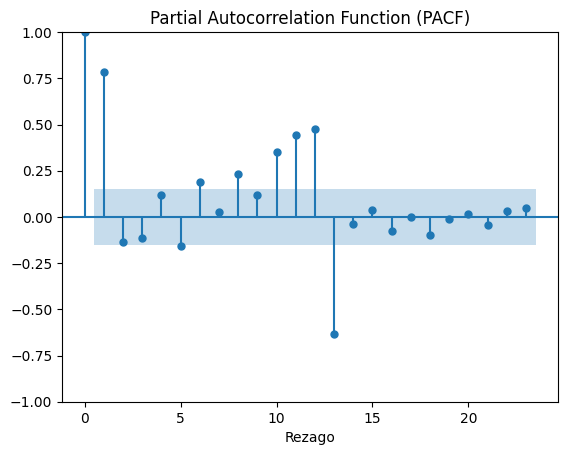

In [250]:
plot_acf(df['Yt'], lags=60)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel("Rezago")
plt.show()

plot_pacf(df['Yt'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel("Rezago")
plt.show()

Como podemos observar en las gráficas de la ACF y la PACF, tenemos barras significativas que se repiten en intervalos regulares, es decir, nos indican que ciertos patrones o ciclos se repiten en la serie temporal, lo que es característico de la estacionalidad. Por lo que podemos concluir que sí existe algún tipo de patrón estacional, siendo más específicos, presenta una variación estacional creciente.
También verificaremos si es necesario aplicar una transformación a la serie mediante el Test de Levene. 

In [124]:
variances = df.var(axis=1)
statistic, p_value = levene(*df.values.T)

print("Estadístico de prueba de Levene:", statistic)
print("Valor p:", p_value)

Estadístico de prueba de Levene: 95.79686550918912
Valor p: 4.698941671986663e-20


Como el valor p es menor que un nivel de significancia específico (tomamos $\alpha = 0.05$), significa que hay suficiente evidencia para aplicar una transformación. De hecho, la misma guía nos indica que aplicar una transformación logarítmica en una serie que presenta variación estacional creciente, es una práctica común para estabilizar la estacionalidad de una serie. Por lo que, procederemos a aplicar una transformación logarítmica:

In [375]:
lambda_value = 1/4
df['Yt_Transformados'] = np.log(df['Yt'])
df


,t,Yt,Yt_Transformados
0,1,501,6.216606
1,2,488,6.190315
2,3,504,6.222576
3,4,578,6.359574
4,5,545,6.300786
...,...,...,...
163,164,1124,7.024649
164,165,868,6.766192
165,166,860,6.756932
166,167,762,6.635947


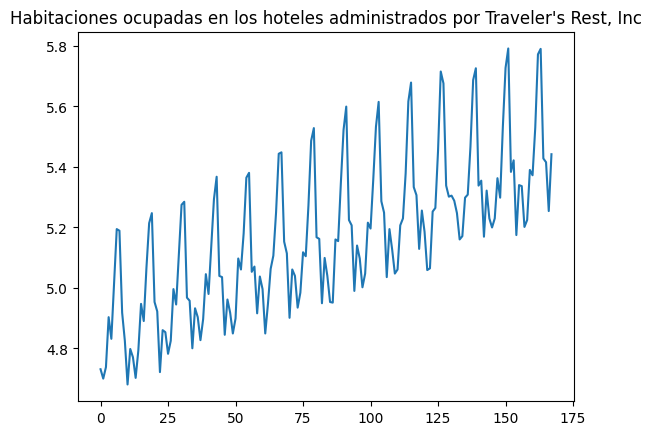

In [264]:
plt.plot(df['Yt_Transformados'])
plt.title("Habitaciones ocupadas en los hoteles administrados por Traveler's Rest, Inc")
plt.show()

Como podemos observar, después de haber aplicado una transformación a la serie, tenemos una reducción considerable en el eje vertical, lo cual nos indica que que la variabilidad se estabilizó. Además, podemos notar que todos los picos de la serie son similares en cuanto a la altura, lo cual, nos da indicios de que logramos una fluctuación estacional constante.
No obstante, un punto a considerar es que aún no contamos con una media constante, sin embargo, el problema sólo hace referencia a las transformaciones y no menciona nada acerca de realizar diferencias para lograr una media constante.


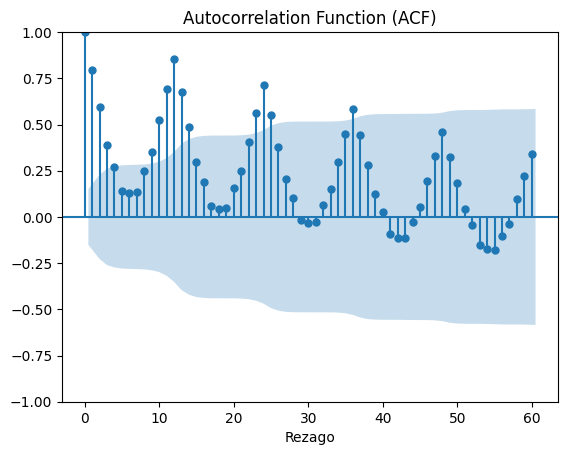

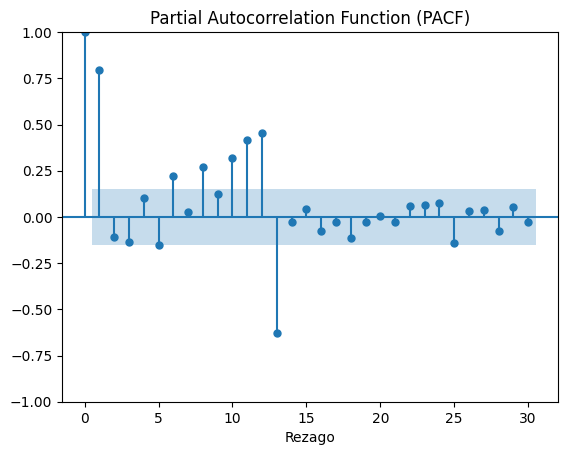

In [152]:
plot_acf(df['Yt_Transformados'], lags=60)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel("Rezago")
plt.show()

plot_pacf(df['Yt_Transformados'],lags=30)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel("Rezago")
plt.show()

# Actividad 9.2
1. Revise la sección 4.2.1 en Giraldo (2006), referente a modelos con variables indicadoras.
2. En el problema de Traveler ́s Rest, Inc. (tabla 9-1), utilice R para realizar una regresión con variables ficticias sobre la serie con estacionalidad constante y pronosticar los promedios de las habitaciones de hotel ocupadas en los meses 169 y 170 con un intervalo de confianza del 95%. Compruebe los supuestos referentes a los residuales del modelo.

Para realizar una regresión con variables ficticias sobre la serie con estacionalidad constante, el autor del libro menciona que como primer paso debemos identificar el periodo de la serie Yt,s y visualizando los picos de la serie y los valoresd de la acf podemos concluir que el periodo de la serie es de 12.

In [376]:
# Asegurarse de que se crean todas las variables ficticias para los meses
# Al usar 'data['t'] % 12 + 1' aseguramos que los meses estén correctamente etiquetados de 1 a 12
month_dummies_full_year = pd.get_dummies((df['t'] % 12) + 1, prefix='month', drop_first=False).astype(int)
if 'month_12' in month_dummies_full_year.columns:
    month_dummies_full_year.drop(columns='month_12', inplace=True)  # Usar diciembre como base y eliminar su columna

# Agregar nuevamente la tendencia lineal y asegurarse de que se incluya correctamente
df['trend'] = df['t']
X_full = pd.concat([add_constant(df['trend']), month_dummies_full_year], axis=1)
y_full = df['Yt_Transformados']
# Ajustar el modelo nuevamente
model_full = OLS(y_full, X_full).fit()
model_full.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       Yt_Transformados   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     730.8
Date:                Tue, 30 Apr 2024   Prob (F-statistic):          9.81e-130
Time:                        16:04:22   Log-Likelihood:                 380.21
No. Observations:                 168   AIC:                            -734.4
Df Residuals:                     155   BIC:                            -693.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1836      0.008    779.753      0.000       6.168       6.199
trend          0.0027   4.18e-05     65.577      0.000       0.003       0.003
month_1        0.1026      0.010     10.355      0.000       0.083       0.122
month_2        0.0622      0.010      6.273      0.000       0.043       0.082
month_3       -0.0094      0.010     -0.945      0.346      -0.029       0.010
month_4        0.0208      0.010      2.101      0.037       0.001       0.040
month_5        0.1436      0.010     14.490      0.000       0.124       0.163
month_6        0.1231      0.010     12.421      0.000       0.103       0.143
month_7        0.2582      0.010     26.514      0.000       0.239       0.277
month_8        0.3930      0.010     38.926      0.000       0.373       0.413
month_9        0.4138      0.010     41.777      0.000       0.394       0.433
month_10       0.1586      0.010     16.012      0.000       0.139       0.178
month_11       0.1421      0.010     14.350      0.000       0.123       0.162
==============================================================================
Omnibus:                       63.504   Durbin-Watson:                   1.378
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.603
Skew:                           1.320   Prob(JB):                     1.18e-66
Kurtosis:                       9.034   Cond. No.                     1.22e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [382]:
# Preparar los datos para la predicción de los meses 169 y 170
# Mes 169 es enero (month_1) y mes 170 es febrero (month_2) del año siguiente
predict_data_months = pd.DataFrame({
    'const': 1,
    'trend': [169, 170],
    'month_1': [1, 0],
    'month_2': [0, 1],
    'month_3': [0, 0],
    'month_4': [0, 0],
    'month_5': [0, 0],
    'month_6': [0, 0],
    'month_7': [0, 0],
    'month_8': [0, 0],
    'month_9': [0, 0],
    'month_10': [0, 0],
    'month_11': [0, 0]
})

# Realizar la predicción para los meses 169 y 170
predictions_169_170 = model_full.predict(predict_data_months)
# Calcular intervalos de confianza
prediction_std_169_170, conf_lower_169_170, conf_upper_169_170 = wls_prediction_std(model_full, exog=predict_data_months, alpha=0.05)

# Resultados de las predicciones con intervalos de confianza
predictions_169_170_results = pd.DataFrame({
    'Month': ['Enero (169)', 'Febrero (170)'],
    'Prediction': predictions_169_170,
    'Confidence Interval Lower Bound': conf_lower_169_170,
    'Confidence Interval Upper Bound': conf_upper_169_170
})
predictions_169_170_results

# Valores transformados
prediction_real_169 = np.exp(6.749365)
lower_bound_real_169 = np.exp(6.695388)
upper_bound_real_169 =np.exp(6.803343)

prediction_real_170  = np.exp(6.711738)
lower_bound_real_170 =np.exp(6.657632)
upper_bound_real_170 =np.exp(6.765844)

# Mostrar los valores reales y los límites de los intervalos de confianza
print("Predicción para el mes 169 (valores reales):", prediction_real_169)
print("Intervalo de confianza del 95% para el mes 169 (valores reales):", lower_bound_real_169, "-", upper_bound_real_169)

print("\nPredicción para el mes 170 (valores reales):", prediction_real_170)
print("Intervalo de confianza del 95% para el mes 170 (valores reales):", lower_bound_real_170, "-", upper_bound_real_170)

Predicción para el mes 169 (valores reales): 853.5166073644289
Intervalo de confianza del 95% para el mes 169 (valores reales): 808.6676363912954 - 900.8538177547989

Predicción para el mes 170 (valores reales): 821.998031266178
Intervalo de confianza del 95% para el mes 170 (valores reales): 778.7047792213307 - 867.6982361417156


# Actividad 9.3




### 1. Realice la lectura de la sección 4.2.2 en Giraldo (2006), relativa a modelación de la estacionalidad con variables trigonométricas.

### 2. Obtenga mediante R un modelo de regresión con términos trigonométricos para el caso de Traveler ́s Rest, Inc (serie con variación estacional estabilizada) y pronostique los meses 169 y 170 con un intervalo de confianza del 95%. Compare sus resultados con los obtenidos a través del método de variables ficticias y discuta sus resultados.

In [388]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS, add_constant

# Asumimos que df es tu DataFrame y que ya contiene la columna 't' y 'Yt_Transformados'
# Frecuencia para estacionalidad anual en datos mensuales
frequency = 2 * np.pi / 12  # 12 meses en un año

# Crear términos trigonométricos
df['sin_t'] = np.sin(frequency * df['t'])
df['cos_t'] = np.cos(frequency * df['t'])

# Preparar las variables independientes incluyendo los términos trigonométricos
X = add_constant(df[['t', 'sin_t', 'cos_t']])

# Variable dependiente
y = df['Yt_Transformados']  # Asegúrate de que 'Yt_Transformados' es tu variable objetivo

# Ajustar el modelo de regresión
model = OLS(y, X).fit()
print(model.summary())

# Supongamos que quieres predecir 2 periodos futuros
t_future = np.array([df['t'].iloc[-1] + 1, df['t'].iloc[-1] + 2])
X_future = add_constant(pd.DataFrame({
    't': t_future,
    'sin_t': np.sin(frequency * t_future),
    'cos_t': np.cos(frequency * t_future)
}))

# Realizar predicciones y obtener intervalos de confianza
predictions = model.get_prediction(X_future)
predictions_summary = predictions.summary_frame(alpha=0.05)  # 95% CI

# Valores transformados
prediction_real_169 = np.exp(6.636460)
lower_bound_real_169 = np.exp(6.608386)
upper_bound_real_169 =np.exp(6.664534)

prediction_real_170  = np.exp(6.648357)
lower_bound_real_170 =np.exp(6.619830)
upper_bound_real_170 =np.exp(6.676884)

# Mostrar los valores reales y los límites de los intervalos de confianza
print("Predicción para el mes 169 (valores reales):", prediction_real_169)
print("Intervalo de confianza del 95% para el mes 169 (valores reales):", lower_bound_real_169, "-", upper_bound_real_169)
print("\nPredicción para el mes 170 (valores reales):", prediction_real_170)
print("Intervalo de confianza del 95% para el mes 170 (valores reales):", lower_bound_real_170, "-", upper_bound_real_170)

                            OLS Regression Results                            
Dep. Variable:       Yt_Transformados   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     313.4
Date:                Tue, 30 Apr 2024   Prob (F-statistic):           1.16e-67
Time:                        16:17:41   Log-Likelihood:                 199.93
No. Observations:                 168   AIC:                            -391.9
Df Residuals:                     164   BIC:                            -379.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3349      0.012    547.945      0.0

Predicción para el mes 169 (valores reales): 762.3913450251167
Intervalo de confianza del 95% para el mes 169 (valores reales): 741.2856176869808 - 784.097990168541

Predicción para el mes 170 (valores reales): 771.5156833632258
Intervalo de confianza del 95% para el mes 170 (valores reales): 749.8176172814663 - 793.8416435632856


### 3. Modele la serie estacional correspondiente al índice general de comercio al por menor en México y la del valor de la producción obtenida de jitomate rojo.

Aún no contamos con esta serie estacional.

### 4. Aplique un modelo de regresión para el factor estacional de otra serie del INEGI.

In [782]:

df2 = pd.read_excel('/Users/maferpazaran/Downloads/Indicadores.xlsx')
df2

,Periodos,Indicadores
0,2005/01,95.906127
1,2005/02,100.314274
2,2005/03,97.585974
3,2005/04,99.147298
4,2006/01,98.604334
...,...,...
71,2022/04,94.290083
72,2023/01,90.965147
73,2023/02,93.611929
74,2023/03,93.299552


Utilizamos una serie de tiempo del INEGI, la cual nos da información acerca de los indicadores de productividad laboral desde el 2005 al 2023 de manera trimestral para poder aplicar un modelo de regresión para el factor estacional. 

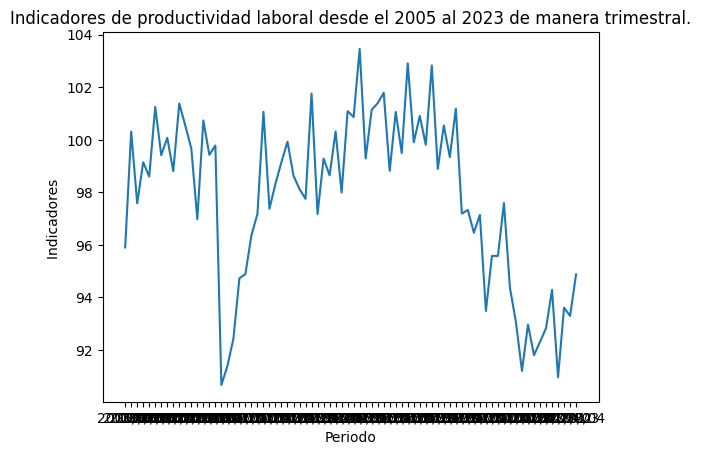

In [676]:
plt.plot(df2['Periodos'],df2['Indicadores'])
plt.title("Indicadores de productividad laboral desde el 2005 al 2023 de manera trimestral.")
plt.xlabel("Periodo")
plt.ylabel("Indicadores ")
plt.show()

Como podemos observar en la gráfica, podemos notar que efectivamente existe estacionalidad, puesto que podemos ver picos significativos cada cierto periodo. También, podemos observar que la serie parece ser homecedastica, puesto que podemos "encerrarla en una cajita", sin embargo, comprobaremos esto mediante el test de Levene, también parece ser que la serie tiene media constante, es decir que no hay tendencia, este supuesto lo verificaremos mediante el test de Dickey-Fuller, donde además nos ayudará a verificar que nuestra serie es estacionaria. 

In [677]:
# Dividir los datos en dos grupos
grupo_antes_2023 = df2[df2['Periodos'].str[:4].astype(int) < 2023]['Indicadores']
grupo_despues_2023 = df2[df2['Periodos'].str[:4].astype(int) >= 2023]['Indicadores']

# Aplicar el test de Levene
statistic, p_value = levene(grupo_antes_2023, grupo_despues_2023)

print("Estadístico de Levene:", statistic)
print("Valor p:", p_value)

Estadístico de Levene: 1.7323919414101803
Valor p: 0.19216823563127988


Dado que el p-valor del test de Levene es mayor que el nivel de significancia, en este caso $\alpha=0.05$, podemos concluir que no rechazamos la hipótesis nula, es decir, nuestro supuesto era cierto y podemos decir que existe homocedasticidad en nuestra serie.

In [678]:
# Convertir la columna 'Periodos' a datetime
df2['Periodos'] = pd.to_datetime(df2['Periodos'])

# Establecer la columna 'Periodos' como índice
df2.set_index('Periodos', inplace=True)

# Aplicar el test de Dickey-Fuller
result = adfuller(df2['Indicadores'])

# Imprimir los resultados
print('Estadístico de Dickey-Fuller:', result[0])
print('Valor p:', result[1])
print('Valores críticos:', result[4])

Estadístico de Dickey-Fuller: -1.244313230438132
Valor p: 0.6542488896974047
Valores críticos: {'1%': -3.5335601309235605, '5%': -2.9064436883991434, '10%': -2.590723948576676}


/var/folders/29/lfzpzjj14vq38h1ydmlmrl9h0000gn/T/ipykernel_3221/4031165909.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df2['Periodos'] = pd.to_datetime(df2['Periodos'])


Dado que el p-valor del test de Dickey-Fuller mayor que el nivel de significancia, en este caso $\alpha=0.05$, podemos decir que no hay suficiente evidencia para rechazar la hipótesis nula de que hay una raíz unitaria en la serie, lo que sugiere que la serie puede ser no estacionaria, por lo que, nuestro supuesto de media cero es falso. Verificaremos la no estacionariedad a través de la ACF.

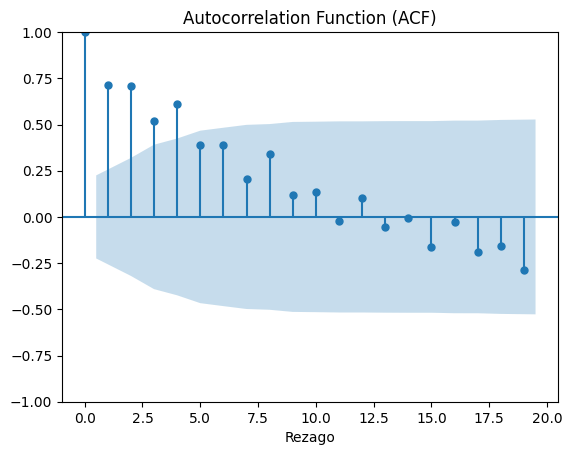

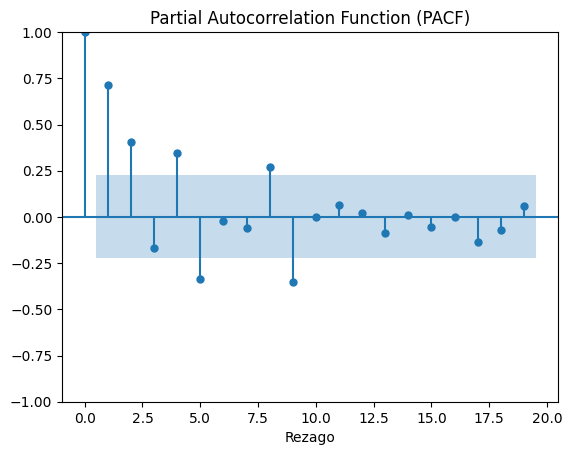

In [783]:
plot_acf(df2['Indicadores'])
plt.title('Autocorrelation Function (ACF)')
plt.xlabel("Rezago")
plt.show()

plot_pacf(df2['Indicadores'])
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel("Rezago")
plt.show()

De acuerdo a la gráfica de la acf, podemos concluir que efectivamente no hay estacionariedad en la serie, pues la gráfica decrece de manera lenta.

In [789]:
df2

,Periodos,Indicadores
0,2005/01,95.906127
1,2005/02,100.314274
2,2005/03,97.585974
3,2005/04,99.147298
4,2006/01,98.604334
...,...,...
71,2022/04,94.290083
72,2023/01,90.965147
73,2023/02,93.611929
74,2023/03,93.299552


In [777]:
df2['Periodos'] = pd.to_datetime(df2['Periodos'])

# Calcular variables trigonométricas para ciclo trimestral
df2['trimestre'] = df2['Periodos'].dt.quarter
df2['sin_trimestre'] = np.sin(2 * np.pi * df2['trimestre'] / 4)
df2['cos_trimestre'] = np.cos(2 * np.pi * df2['trimestre'] / 4)

# Ajustar el modelo de regresión con términos trigonométricos para ciclo trimestral
X = df2[['sin_trimestre', 'cos_trimestre']]
X = sm.add_constant(X)
y = df2['Indicadores']

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Indicadores   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     5.199
Date:                Mon, 29 Apr 2024   Prob (F-statistic):             0.0255
Time:                        23:04:33   Log-Likelihood:                -194.11
No. Observations:                  76   AIC:                             392.2
Df Residuals:                      74   BIC:                             396.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            65.5248      0.278    235.305

### 5. Realice la lectura de las secciones 1.6 a 1.8 en Montemayor (2012) que menciona ajustes que se deben hacer a las series de tiempo por diversas situaciones (por ejemplo, efectos del calendario). Resuma sus ideas en un mapa mental y exponga sus resultados.

## Conclusiones  9.3
Para el ejercicio número cuatro, tuvimos dificultades al buscar la serie para poder aplicar un modelo de regresión para el factor estacional, esto debido a que debíamos buscar una serie que tuviera estacionalidad, por lo que, tuvimos que visualizar una amplia variedad de gráficas de las series para observar si tenían estacionalidad. 

## Parte Raúl